In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('aud_data.csv',delimiter=';')

In [3]:
df.head()

,Date,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f24,m1,m2,m3,m4,m5,m6,m7,m8,target
0,31.12.2018,0.2,0.4,-1.0,1.8,-0.7,0.1,0.3,1.2,1.1,...,0.2,5646.3999,6.5999,2.318,1.906,1.900,1.638,-0.75,40.15,0.7049
1,30.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5654.3242,6.5981,2.362,1.942,1.934,1.647,-0.70,40.95,0.7047
4,27.12.2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5597.2378,6.5850,2.378,1.953,1.953,1.646,-1.35,40.20,0.7033


In [4]:
df['Date']=pd.to_datetime(df['Date'], dayfirst = True)

In [5]:
df=df.set_index('Date')

In [6]:
fundamentals=df[[col for col in df.columns if 'f' in col]].columns.tolist()
market=df[[col for col in df.columns if 'm' in col]].columns.tolist()

In [7]:
df[fundamentals]=df[fundamentals].apply(lambda x: x.fillna(method='bfill').fillna(0), axis=0)

In [8]:
market_data=df[market][df.index.dayofweek<5]

In [9]:
market_data.info()
# m6 has half of the data abscent

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7306 entries, 2018-12-31 to 1990-12-31
Data columns (total 8 columns):
m1     6733 non-null float64
m2     7306 non-null float64
m3     7291 non-null float64
m4     7161 non-null float64
m5     7179 non-null float64
m6     3550 non-null float64
m7     4962 non-null float64
m8     4966 non-null float64
dtypes: float64(8)
memory usage: 513.7 KB


In [10]:
def remove_outliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    return data[(data>(Q1-1.5*IQR)) & (data<(Q3+1.5*IQR))]

In [11]:
new_md=pd.DataFrame(index=market_data.index, columns=market_data.columns)

In [15]:
market_data=market_data.pct_change(periods=1,fill_method=None)

In [16]:
for col in new_md.columns:
    m=remove_outliers(market_data[col])
    new_md[col].loc[m.index,]=m

In [17]:
new_md

,m1,m2,m3,m4,m5,m6,m7,m8
Date,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,0.00140343,-0.000272731,0.0189819,0.0188877,0.0178947,0.00549451,-0.0666667,0.0199253
2018-12-27,-0.0100961,-0.00198542,0.00677392,0.00566426,0.0098242,-0.000607165,NaN,-0.018315
2018-12-26,NaN,0.00469248,-0.00630782,-0.00972862,-0.0030722,-0.0109356,NaN,0.0437811
2018-12-25,NaN,-0.00424734,0,0,0,0.017199,0,0
2018-12-24,NaN,0.00183673,0,0,0,0,0,-0.000238322
2018-12-21,-0.00476184,-0.00127275,0.0101566,0.0186143,0.0133539,0.00362319,NaN,-0.0297974
2018-12-20,0.00698338,0.00966396,-0.0188521,-0.0172589,-0.0212874,-0.00481348,NaN,0.014742
2018-12-19,0.013581,0.000135233,0.0183604,0.0206612,0.00725013,0.00785973,NaN,-0.0569007


In [45]:
market_data=market_data.fillna(method='bfill').fillna(method='ffill')

In [46]:
market_data=market_data.pct_change(periods=1).fillna(method='bfill')

In [47]:
market_data

,m1,m2,m3,m4,m5,m6,m7,m8
Date,,,,,,,,
2018-12-31,0.001403,-0.000273,0.018982,0.018888,0.017895,0.005495,-0.066667,0.019925
2018-12-28,0.001403,-0.000273,0.018982,0.018888,0.017895,0.005495,-0.066667,0.019925
2018-12-27,-0.010096,-0.001985,0.006774,0.005664,0.009824,-0.000607,0.928571,-0.018315
2018-12-26,-0.018480,0.004692,-0.006308,-0.009729,-0.003072,-0.010936,1.000000,0.043781
2018-12-25,0.000000,-0.004247,0.000000,0.000000,0.000000,0.017199,0.000000,0.000000
2018-12-24,0.000000,0.001837,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000238
2018-12-21,-0.004762,-0.001273,0.010157,0.018614,0.013354,0.003623,-0.407407,-0.029797
2018-12-20,0.006983,0.009664,-0.018852,-0.017259,-0.021287,-0.004813,0.468750,0.014742
2018-12-19,0.013581,0.000135,0.018360,0.020661,0.007250,0.007860,-1.680851,-0.056901


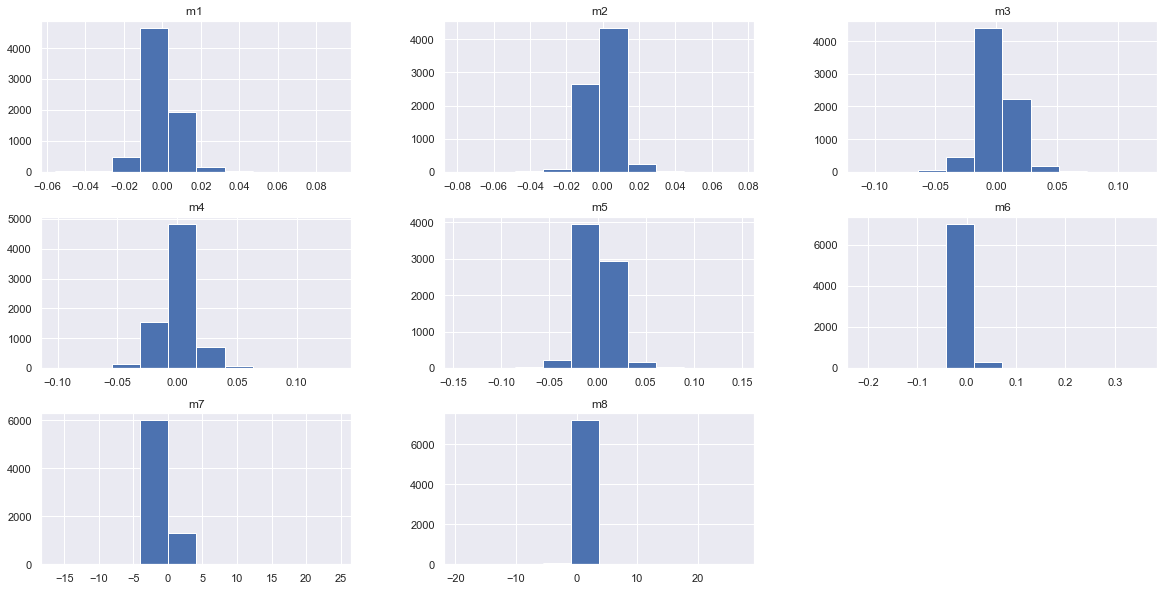

In [17]:
market_data.hist(figsize=(20, 10), bins=10);

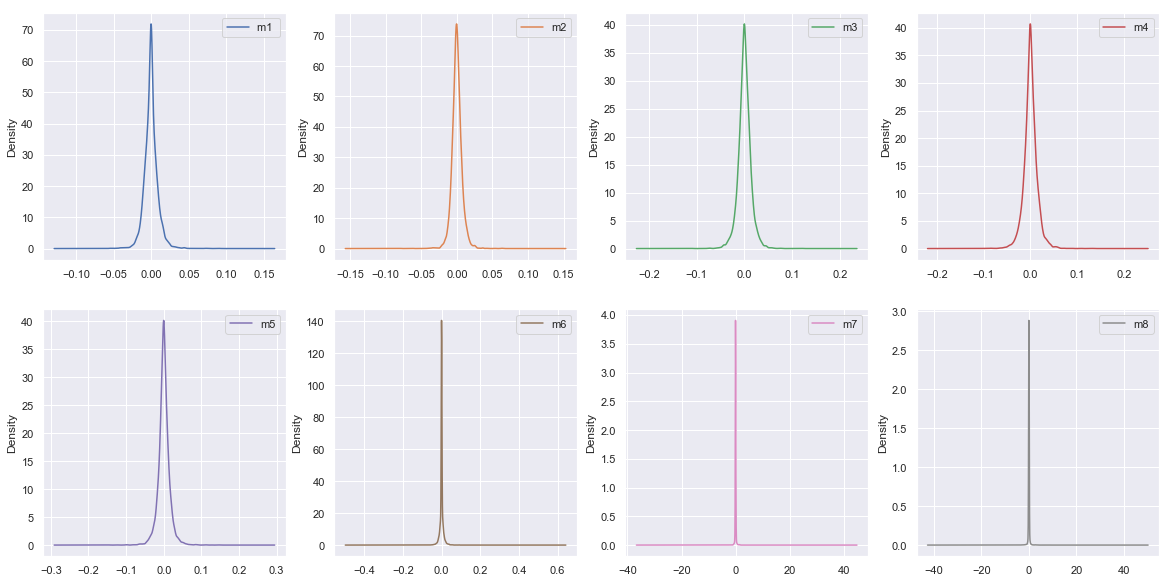

In [19]:
market_data.plot(kind='density', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

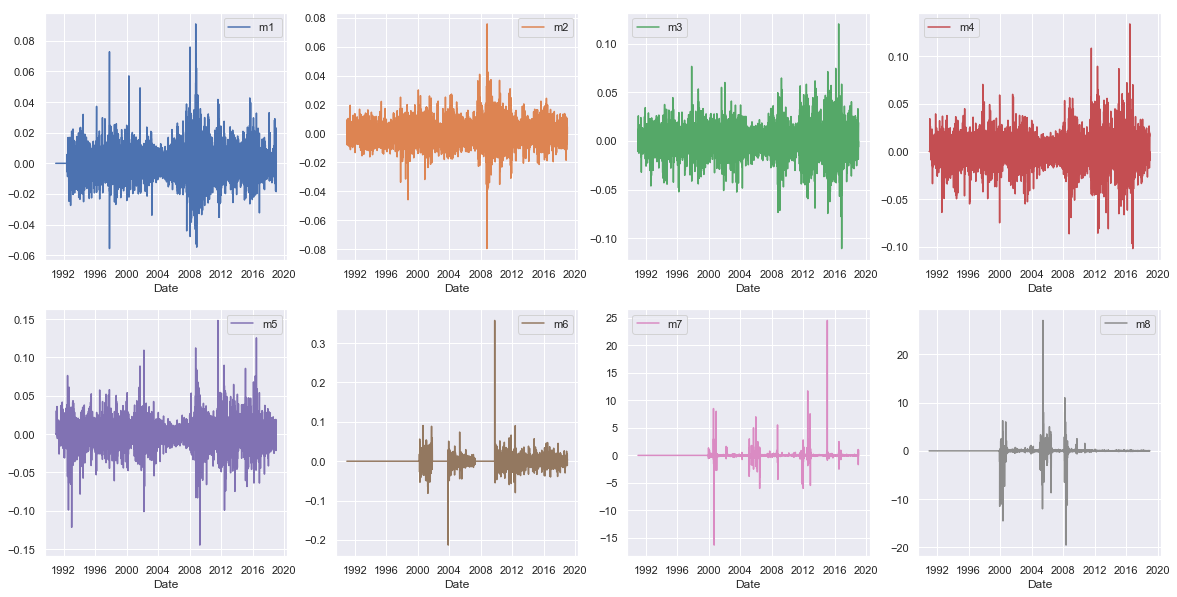

In [20]:
market_data.plot(kind='line', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

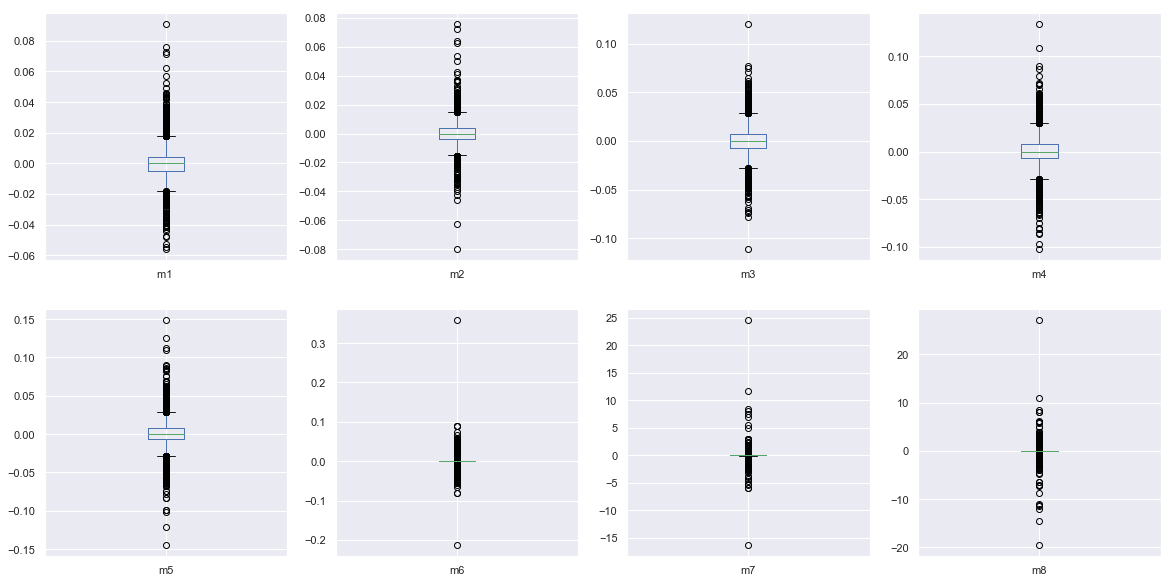

In [21]:
market_data.plot(kind='box', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

In [11]:
def remove_outliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    return data[(data>(Q1-1.5*IQR)) & (data<(Q3+1.5*IQR))]

In [12]:
new_md=pd.DataFrame(index=market_data.index, columns=market_data.columns)

In [27]:
for col in new_md.columns:
    m=remove_outliers(market_data[col])
    new_md[col].loc[m.index,]=m

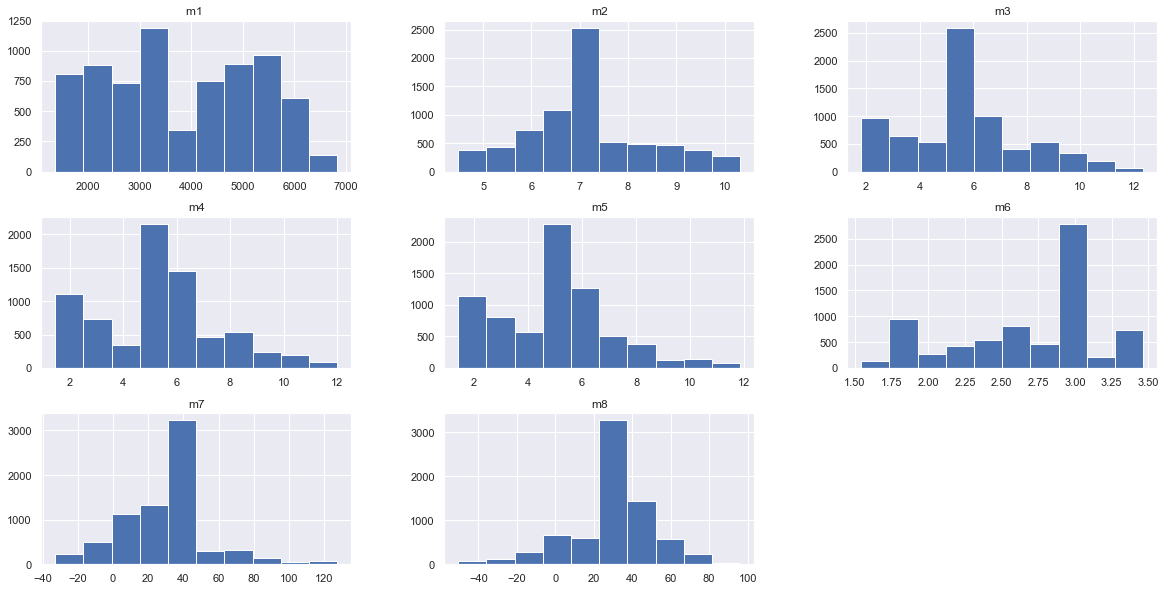

In [10]:
market_data.hist(figsize=(20, 10));

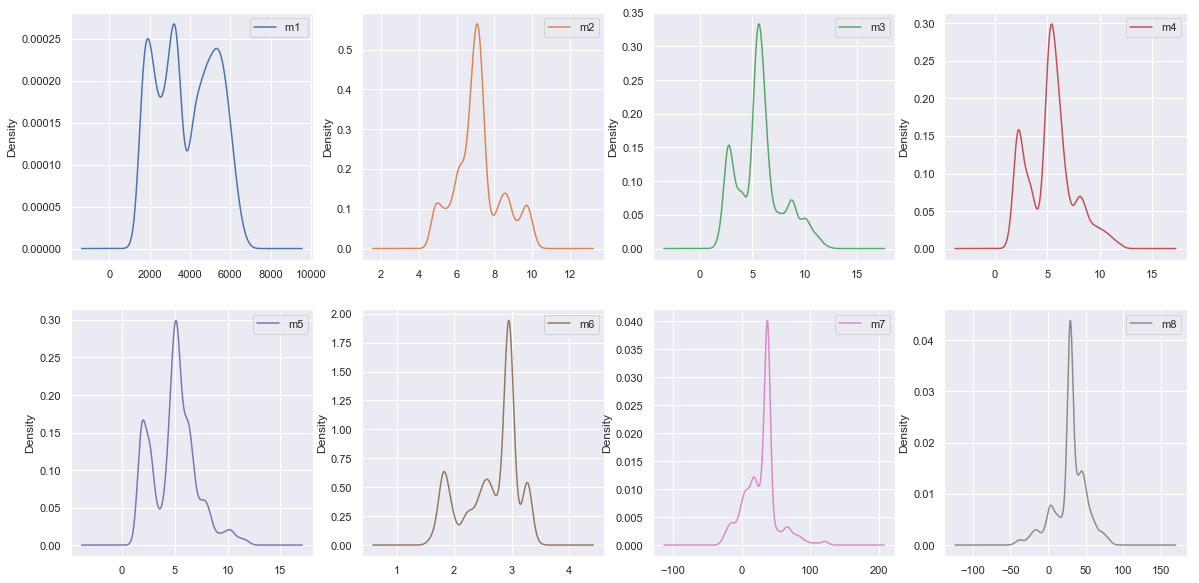

In [11]:
market_data.plot(kind='density', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

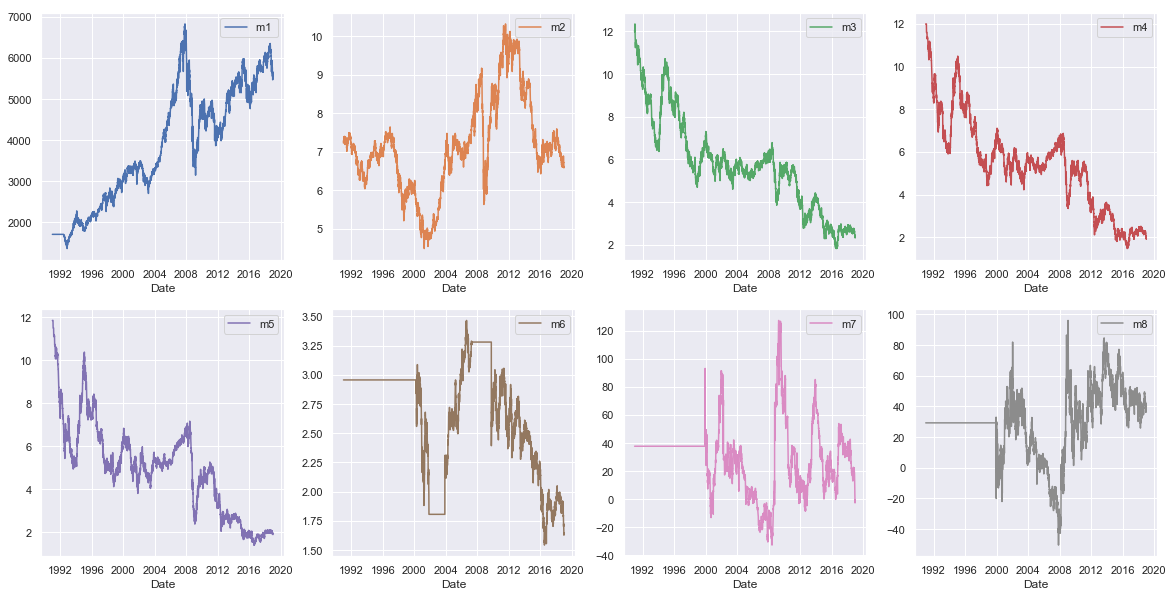

In [12]:
market_data.plot(kind='line', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

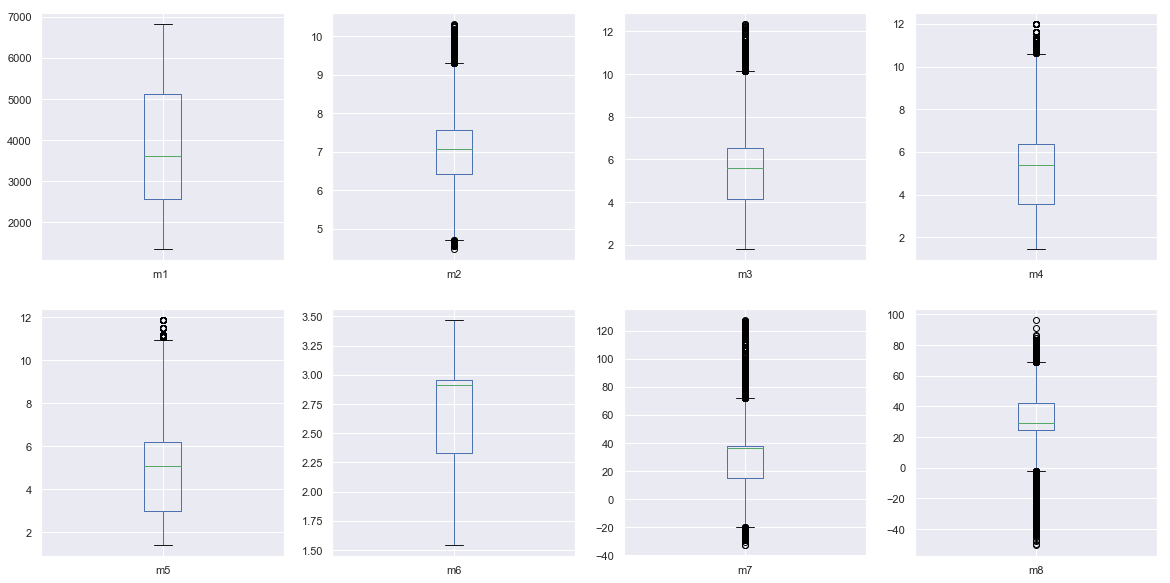

In [13]:
market_data.plot(kind='box', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(20, 10));

In [65]:
new_md=pd.DataFrame(index=market_data.index, columns=market_data.columns)

In [66]:
new_md.columns

Index(['m1 ', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8'], dtype='object')

In [100]:
for col in new_md.columns.tolist():
    new_md[[col]].add(remove_outliers(market_data[[col]]),fill_value=0)

In [101]:
new_md

,m1,m2,m3,m4,m5,m6,m7,m8
Date,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
type(m2)

pandas.core.series.Series

In [98]:
len(new_md['m2'].add(remove_outliers(m2),fill_value=0))

7306

In [99]:
len(remove_outliers(m2))

6681

In [62]:
new_md['m2']=new_md.m2.add(remove_outliers(m2),fill_value=0)

In [63]:
type(new_md['m2'])

pandas.core.series.Series

In [64]:
new_md

,m1,m2,m3,m4,m5,m6,m7,m8
Date,,,,,,,,
2018-12-31,NaN,6.5999,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,6.5981,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,6.585,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,6.6159,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-25,NaN,6.5878,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-24,NaN,6.5999,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-21,NaN,6.5915,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-20,NaN,6.6552,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-19,NaN,6.6561,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
f0=market_data.pct_change(periods=1).fillna(method='bfill')
f1=market_data.pct_change(periods=5).fillna(method='bfill')
f2=market_data.pct_change(periods=10).fillna(method='bfill')
f3=market_data.pct_change(periods=30).fillna(method='bfill')

In [21]:
f4=f0.rolling(5).mean().fillna(method='bfill')
f5=f0.rolling(10).mean().fillna(method='bfill')
f6=f0.rolling(30).mean().fillna(method='bfill')

In [22]:
market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]]=f1
market_data[['m'+str(i)+'_pct_change_10' for i in range(1,9)]]=f2
market_data[['m'+str(i)+'_pct_change_30' for i in range(1,9)]]=f3

market_data[['m'+str(i)+'_mva_5' for i in range(1,9)]]=f4
market_data[['m'+str(i)+'_mva_10' for i in range(1,9)]]=f5
market_data[['m'+str(i)+'_mva_30' for i in range(1,9)]]=f6

In [13]:
changes=market_data[['m'+str(i)+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'_pct_change_30' for i in range(1,9)]]

In [14]:
f4=changes.rolling(5).mean()
f5=changes.rolling(10).mean()
f6=changes.rolling(30).mean()

In [15]:
market_data[['m'+str(i)+'MV_5'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_5'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_5'+'_pct_change_30' for i in range(1,9)]]=f4
            
market_data[['m'+str(i)+'MV_10'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_10'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_10'+'_pct_change_30' for i in range(1,9)]]=f5

market_data[['m'+str(i)+'MV_30'+'_pct_change_5' for i in range(1,9)]+\
           ['m'+str(i)+'MV_30'+'_pct_change_10' for i in range(1,9)]+\
           ['m'+str(i)+'MV_30'+'_pct_change_30' for i in range(1,9)]]=f6